In [1]:
# import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [2]:
import time
from datetime import datetime 

In [3]:
import requests

In [4]:
from config import weather_api_key

In [5]:
url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [6]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [7]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [8]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

52.90665835412966 105.51137298263194
-68.65324513997558 33.84311820119737
55.142061032825325 -173.8309408551931
85.24255981731204 93.12524481555704
-59.62629462171608 66.16218515866024
-26.83235094888326 -163.85119243863863
-49.52455493604992 89.7566594290663
-38.95333679253617 90.37349106884687
37.62247821939255 25.559979538523663
73.4981551976694 -177.044592222069
31.291865325463064 7.330195035356297
11.59500046910452 112.13285932239313
-79.03051083477756 125.30503492517408
-13.247206870950848 37.928271609612835
85.58139099639001 -78.69872169859119
31.80572121987197 150.5615210886656
50.63950923372565 -132.49860351271502
-65.86630404172386 -138.29046564767464
44.21657151122014 71.61962456199046
-35.35752342925397 101.90087729385397
-60.041461119057715 19.602425481152437
-61.18748305491402 -171.09978331778507
5.698744120733394 172.70704185859768
-3.6049978980609154 -173.63924423233308
67.85513568790608 -151.41748706733662
-87.68907692662086 -94.18847029129057
-61.34368693185851 -98.08

44.080229941422175 -148.97673485033383
42.29445124828399 -148.5603931542036
-81.31635301078839 -115.42765512269537
-37.41977942021265 13.384748399769535
-26.705305758070452 46.68919436507815
-80.27132373483846 77.43338478392832
17.756597634612334 -131.45696708496595
-32.55988816613952 78.22889760679442
-31.64358082321133 152.66556005403015
-5.3932391950845044 30.946850000609714
-30.14127031016443 -152.91062039227455
-66.88452576686477 11.141466801177586
-20.271747610069113 -145.04190935533578
-76.40434167590092 16.90428107862587
86.18786372770771 -101.98613286794532
-15.447650738336591 14.539636309089872
-77.22166065830388 60.67981222008703
6.654751966346936 132.87171827458963
-45.82603250519913 -118.74442135019714
-32.43073116885842 165.38047063896437
37.60750831395909 20.464290206349887
-74.5748568036653 -166.87874135631074
-44.858042159128416 22.358868924854022
-67.58887716199715 70.89062296133545
63.71083877422345 -151.26337365455296
-57.47118785078078 -66.9371305240777
64.34664382

59.64704921983713 15.360423062276993
-29.37423474419076 111.07027283855928
25.045967325869597 -144.7285869548286
87.0499946472433 102.3263992180373
70.93455675869347 177.76868268664322
-11.22918907732506 -125.54510498351053
47.45850956240156 -84.56103558869097
-25.92161619569849 30.229761154863127
-3.1926033055795813 130.21411669182487
-3.9393939517681105 171.45518676258172
81.40085905816628 -145.40654226940396
-44.1866622046712 13.130666455333682
25.453008123903984 -51.39987921589923
30.369350336189655 -18.402855413275176
57.27260027233885 -90.9275370439593
-22.95475078986304 -93.53698890958832
78.36478335984785 3.324655020562318
78.77454684190226 -133.73393361434844
-69.74802037750047 -163.3733308053657
40.624662297998356 -45.073793331226284
8.390111547866809 119.84837075732042
-16.341226587952633 -78.8434848503793
63.660543780288606 -25.257967418517012
83.9965949736497 -168.380946839465
59.77319788312573 79.26976651830529
-73.93410396055619 -78.36976693293026
-87.73885434372548 93.2

In [9]:
# create a list for holding the cities
cities = []
# Identifying nearest city
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    if city not in cities:
        cities.append(city)
        
len(cities)
    
    

603

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bayanday
Processing Record 2 of Set 1 | port elizabeth
Processing Record 3 of Set 1 | provideniya
Processing Record 4 of Set 1 | khatanga
Processing Record 5 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 6 of Set 1 | avarua
Processing Record 7 of Set 1 | busselton
Processing Record 8 of Set 1 | ano mera
Processing Record 9 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 10 of Set 1 | warqla
City not found. Skipping...
Processing Record 11 of Set 1 | cam ranh
Processing Record 12 of Set 1 | new norfolk
Processing Record 13 of Set 1 | montepuez
Processing Record 14 of Set 1 | qaanaaq
Processing Record 15 of Set 1 | hasaki
Processing Record 16 of Set 1 | prince rupert
Processing Record 17 of Set 1 | rikitea
Processing Record 18 of Set 1 | mikhaylovka
Processing Record 19 of Set 1 | bredasdorp
Processing Record 20 of Set 1 | vaini
Processing Record 21 of Set 

City not found. Skipping...
Processing Record 35 of Set 4 | foz
Processing Record 36 of Set 4 | siguiri
Processing Record 37 of Set 4 | yeppoon
Processing Record 38 of Set 4 | anadyr
Processing Record 39 of Set 4 | bereda
Processing Record 40 of Set 4 | locri
Processing Record 41 of Set 4 | plainview
Processing Record 42 of Set 4 | tessalit
Processing Record 43 of Set 4 | katsuura
Processing Record 44 of Set 4 | port lincoln
Processing Record 45 of Set 4 | tabiauea
City not found. Skipping...
Processing Record 46 of Set 4 | oistins
Processing Record 47 of Set 4 | sredneuralsk
Processing Record 48 of Set 4 | kaitangata
Processing Record 49 of Set 4 | maniitsoq
Processing Record 50 of Set 4 | guruvayur
Processing Record 1 of Set 5 | nushki
Processing Record 2 of Set 5 | awjilah
Processing Record 3 of Set 5 | tomohon
Processing Record 4 of Set 5 | waingapu
Processing Record 5 of Set 5 | tivaouane
Processing Record 6 of Set 5 | iranshahr
Processing Record 7 of Set 5 | taoudenni
Processing 

Processing Record 24 of Set 8 | north bend
Processing Record 25 of Set 8 | bambous virieux
Processing Record 26 of Set 8 | ramshir
Processing Record 27 of Set 8 | naze
Processing Record 28 of Set 8 | santa cruz
Processing Record 29 of Set 8 | huarmey
Processing Record 30 of Set 8 | ravar
Processing Record 31 of Set 8 | kawalu
Processing Record 32 of Set 8 | sitka
Processing Record 33 of Set 8 | tecoanapa
Processing Record 34 of Set 8 | nuevo progreso
Processing Record 35 of Set 8 | monsenhor gil
Processing Record 36 of Set 8 | shache
Processing Record 37 of Set 8 | mendahara
City not found. Skipping...
Processing Record 38 of Set 8 | ust-shonosha
Processing Record 39 of Set 8 | thana
Processing Record 40 of Set 8 | porto novo
Processing Record 41 of Set 8 | pirgos
Processing Record 42 of Set 8 | lata
Processing Record 43 of Set 8 | lima
Processing Record 44 of Set 8 | beringovskiy
Processing Record 45 of Set 8 | andujar
Processing Record 46 of Set 8 | paptalaya
Processing Record 47 of 

City not found. Skipping...
Processing Record 12 of Set 12 | santa maria
Processing Record 13 of Set 12 | vercheres
Processing Record 14 of Set 12 | mailsi
Processing Record 15 of Set 12 | raudeberg
Processing Record 16 of Set 12 | ouallam
Processing Record 17 of Set 12 | neuquen
Processing Record 18 of Set 12 | moron
Processing Record 19 of Set 12 | pilar
Processing Record 20 of Set 12 | dali
Processing Record 21 of Set 12 | turayf
Processing Record 22 of Set 12 | fairbanks
Processing Record 23 of Set 12 | komsomolskiy
Processing Record 24 of Set 12 | chara
Processing Record 25 of Set 12 | mulanje
Processing Record 26 of Set 12 | kashima
Processing Record 27 of Set 12 | altagracia de orituco
Processing Record 28 of Set 12 | brae
Processing Record 29 of Set 12 | shibetsu
Processing Record 30 of Set 12 | maumere
Processing Record 31 of Set 12 | teguise
Processing Record 32 of Set 12 | kurlovo
Processing Record 33 of Set 12 | hailar
Processing Record 34 of Set 12 | norrtalje
Processing R

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bayanday,53.0661,105.5139,60.55,66,65,3.42,RU,2022-07-20 23:58:47
1,Port Elizabeth,-33.9180,25.5701,55.31,89,75,8.05,ZA,2022-07-20 23:57:30
2,Provideniya,64.3833,-173.3000,48.36,66,75,22.37,RU,2022-07-20 23:58:48
3,Khatanga,71.9667,102.5000,48.49,60,100,21.81,RU,2022-07-20 23:58:49
4,Avarua,-21.2078,-159.7750,75.25,69,75,16.11,CK,2022-07-20 23:58:50
5,Busselton,-33.6500,115.3333,56.26,92,100,12.33,AU,2022-07-20 23:58:50
6,Ano Mera,37.4500,25.4000,73.47,68,0,27.69,GR,2022-07-20 23:58:51
7,Cam Ranh,11.9214,109.1591,76.96,88,75,3.44,VN,2022-07-20 23:58:52
8,New Norfolk,-42.7826,147.0587,41.92,72,4,1.72,AU,2022-07-20 23:53:59
9,Montepuez,-13.1256,38.9997,57.47,98,4,3.71,MZ,2022-07-20 23:58:53


In [25]:
new_Columns_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_Columns_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bayanday,RU,2022-07-20 23:58:47,53.0661,105.5139,60.55,66,65,3.42
1,Port Elizabeth,ZA,2022-07-20 23:57:30,-33.9180,25.5701,55.31,89,75,8.05
2,Provideniya,RU,2022-07-20 23:58:48,64.3833,-173.3000,48.36,66,75,22.37
3,Khatanga,RU,2022-07-20 23:58:49,71.9667,102.5000,48.49,60,100,21.81
4,Avarua,CK,2022-07-20 23:58:50,-21.2078,-159.7750,75.25,69,75,16.11
...,...,...,...,...,...,...,...,...,...
547,Belfast,GB,2022-07-21 00:29:42,54.5833,-5.9333,55.99,82,100,6.91
548,Amahai,ID,2022-07-21 00:32:48,-3.3333,128.9167,79.05,86,91,9.37
549,Los Llanos De Aridane,ES,2022-07-21 00:33:49,28.6585,-17.9182,67.75,88,20,17.27
550,Aborlan,PH,2022-07-21 00:33:50,9.4352,118.5492,82.47,65,100,2.64


In [27]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")


In [31]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


In [32]:
import time

today = time.strftime("%x")
today

'07/21/22'

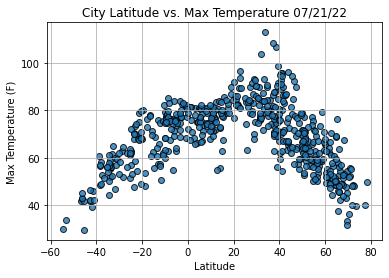

In [33]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

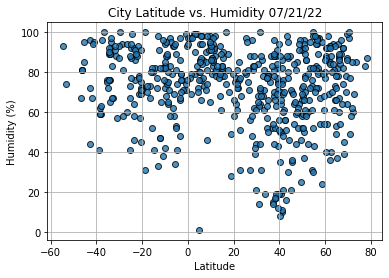

In [34]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

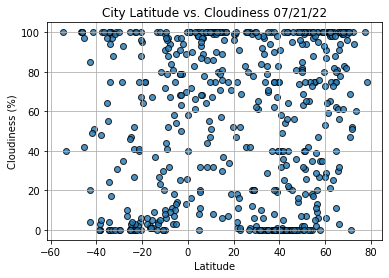

In [35]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

In [ ]:
# Build the scatter plots for latitude vs. Wind Speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()